# Exercise 03.b: Stability of the oscillation equation

**Due:** _15 December 2020_

**Names:** Linus, Lukas, Mariana, David

Considering the following oscillation equation
$$\frac{{\rm d}q}{{\rm d}t}+i f q = 0$$
where $f$ is the Coriolis parameter. Its analytic solution is $q=q_{0} {\rm e}^{-ift}$.

1. Discretize the oscillation equation using forward Euler, backward Euler and leap-frog schemes and analyse their stability, respectively.

1. With initial value $q_0 = {\rm e}^{i{\pi}/4}$, and $f=10^{-4}s^{-1}$ and $\Delta t=100s$, attempt to solve the oscillation equation by forward Euler, backward Euler and leap-frog schemes, respectively. Integrate the numerical equations for about ten periods of oscillation and compare the numerical solutions with analytic solution.

1. Take $\Delta t=200, 500 \text{ and } 1000s$, repeat the integration, and compare them with analytic solution.


In [135]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## 2.)

In [175]:
#Inititializing 
f   = 0.0001                 #s⁻¹
q0  = np.exp(np.pi*0.25j)
RHS = -f*1j                  
q = Linear_Solver(RHS,q0)

# Foreward Euler

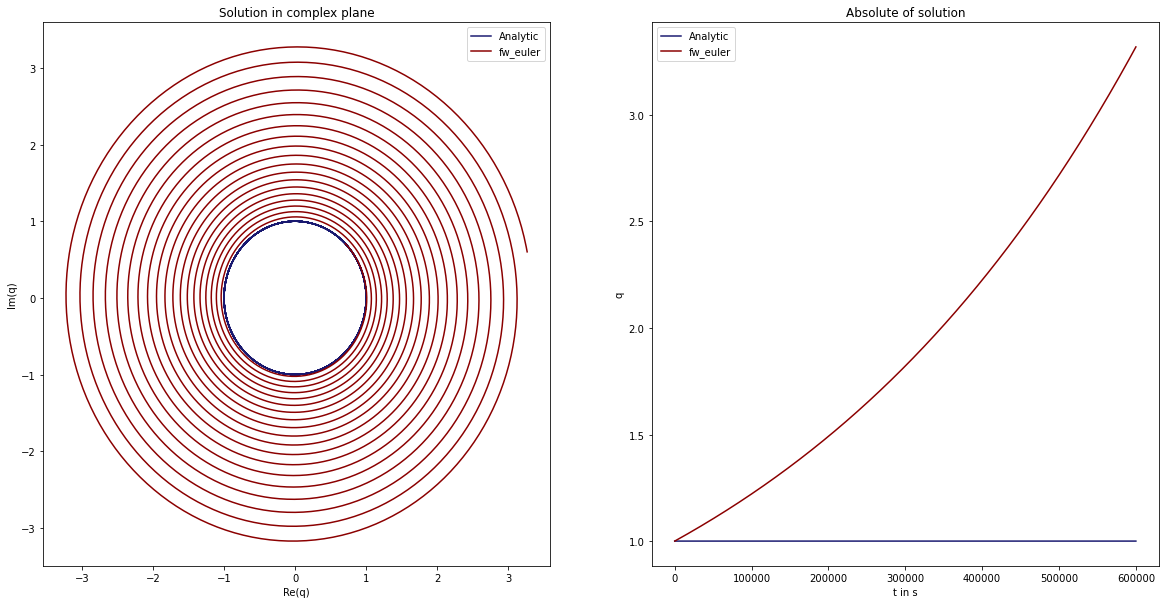

In [176]:
q.solve(method='fw_euler')
q.plot_sol()

# Backward Euler

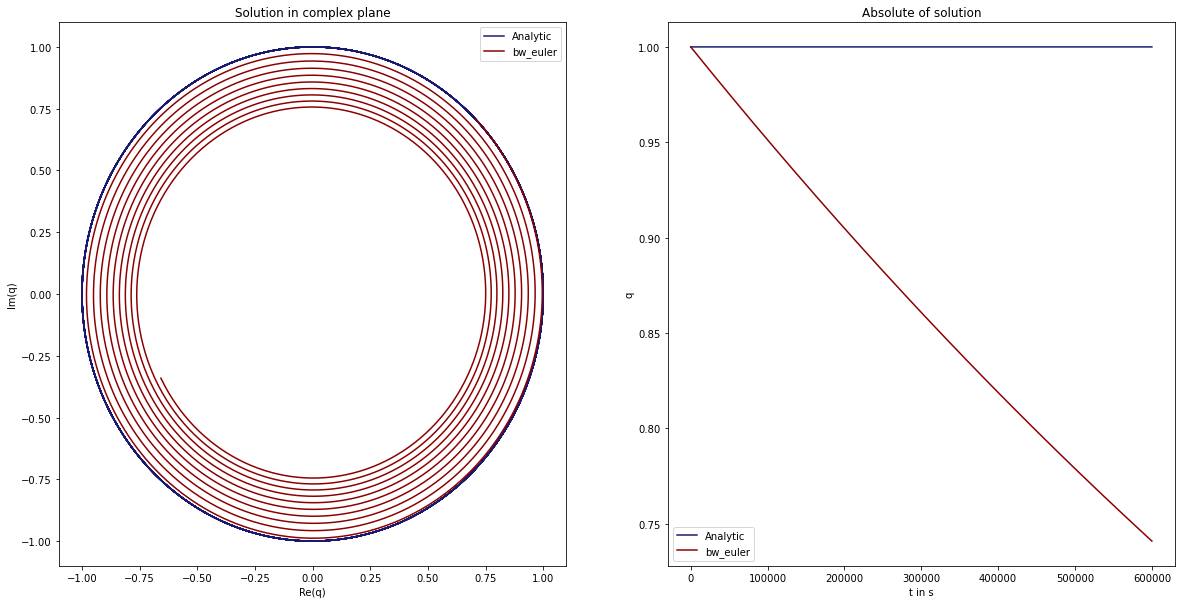

In [138]:
q.solve(method='bw_euler')
q.plot_sol()

# Leapfrog

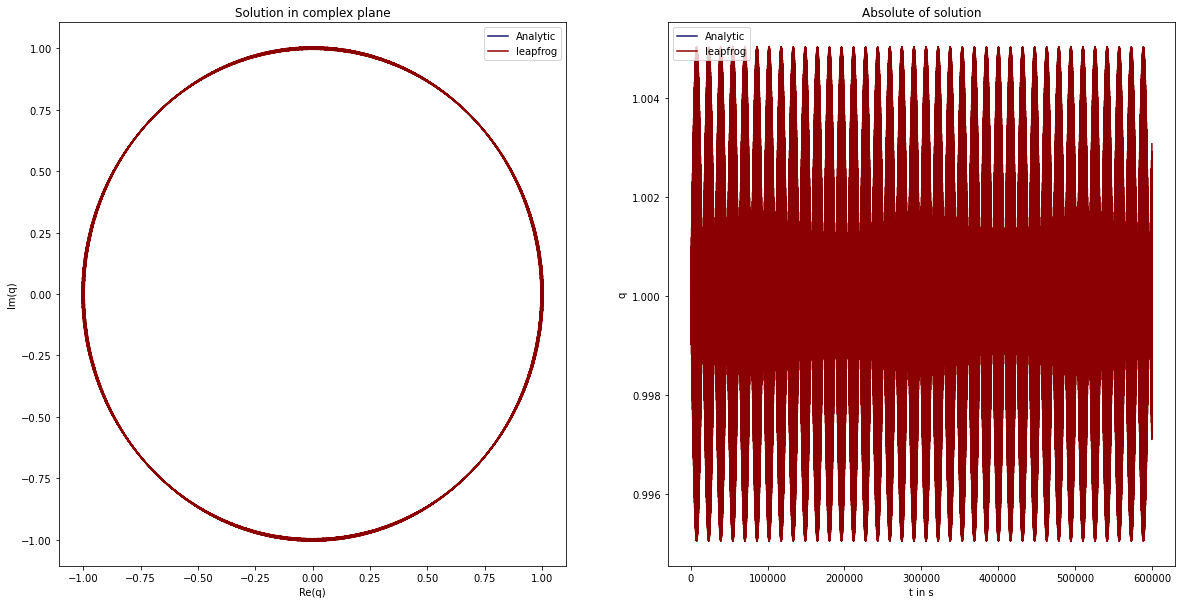

In [177]:
q.solve(method='leapfrog')
q.plot_sol()

In [174]:
class Linear_Solver:
    def __init__(self, RHS, y0, params = None):
        if params is None:
            params  = {'N': 6000, 'dt': 100}
        self.dt  = params['dt']
        self.N  = params['N']
        self.RHS = RHS
        self.y0  = y0
        self.keywords()
    
    def keywords(self):
        self.key_dict = {'fw_euler': self.Euler_foreward,'bw_euler': self.Euler_backward,'leapfrog': self.Leap_frog}
    
    def Euler_foreward(self,q_0):
        q_1 = (1+2*self.dt*self.RHS)*q_0
        return(q_1)

    def Euler_backward(self,q_0):
        q_1 = q_0/(1-self.dt*self.RHS)
        return(q_1)

    def Leap_frog(self,q_01):
        q_2 = self.onestep+2*self.dt*self.RHS*q_01
        self.onestep = q_01
        return(q_2)
    
    def analytic(self):
        return(self.y0*np.exp(self.RHS*self.t))     

    def solve(self,method='fw_euler', N=None, dt=None):
        
        if N is not None:
            self.N  = N
        if dt is not None:
            self.dt = dt
        
        if method is 'leapfrog':
            self.onestep = self.y0
            y = [self.Euler_foreward(self.y0)]
        else:
            y = [self.y0] 
                    
        scheme = self.key_dict[method]
        t = [0]
        for i in range(self.N):
            step = scheme(y[i])
            y.append(step)
            t.append(t[i]+self.dt)
        self.sol = np.array(y)
        self.t   = np.array(t)
        self.an  = self.analytic()
        self.method = method
        if method is 'leap_frog':
            self.sol 
    
    def plot_sol(self):
        plt.figure(figsize=(20,10))
        plt.subplot(1, 2, 1)
        plt.plot(self.an.real,self.an.imag , color='midnightblue', linestyle='-',label='Analytic')
        plt.plot(self.sol.real,self.sol.imag , color='darkred', label=self.method)
        plt.title('Solution in complex plane')
        plt.ylabel(r'Im(q)')
        plt.xlabel(r'Re(q)')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.t,abs(self.an) , color='midnightblue', linestyle='-',label='Analytic')
        plt.plot(self.t,abs(self.sol) , color='darkred', label=self.method)
        plt.title('Absolute of solution')
        plt.xlabel(r't in s')
        plt.ylabel(r'q')
        plt.legend()
        plt.show()
        